In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import torch.backends.cudnn as cudnn
cudnn.benchmark = True  # fire on all cylinders
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cpu')
if torch.cuda.is_available():
  device = torch.device('cuda')
print(device)
dtype = torch.float32

cuda


In [3]:
# Importing CIFAR train and test data
train_data = datasets.CIFAR10(root='data1', train=True, transform=transforms.ToTensor(), download=True)
test_data = datasets.CIFAR10(root='data1', train=False, transform=transforms.ToTensor(), download=True)

100%|██████████| 170498071/170498071 [53:43<00:00, 52885.32it/s] 


Extracting data1\cifar-10-python.tar.gz to data1
Files already downloaded and verified


In [4]:
print(len(train_data), len(test_data))
print(train_data[0][0].shape)

50000 10000
torch.Size([3, 32, 32])


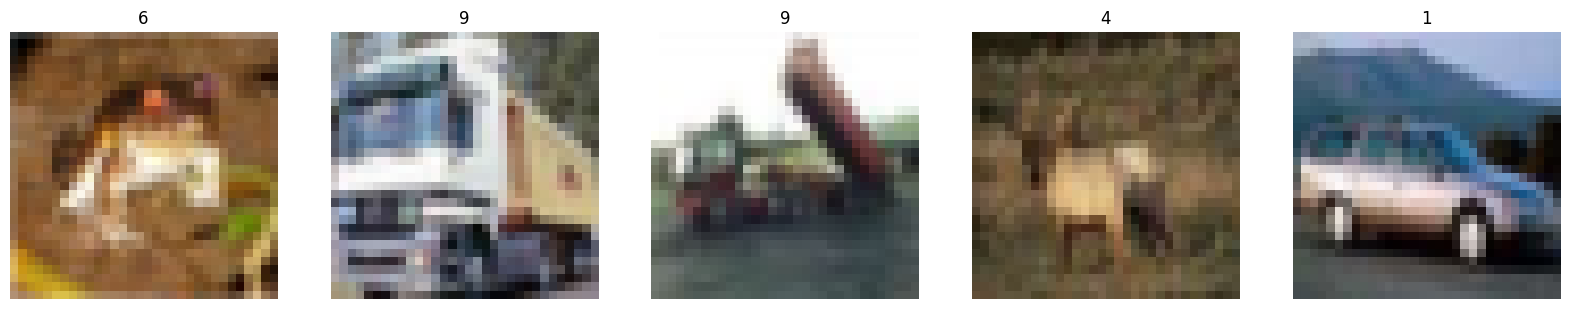

In [5]:
# Visualizing some samples
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
  ax[i].imshow(train_data[i][0].permute(1, 2, 0))
  ax[i].set_title(train_data[i][1])
  ax[i].axis('off')

In [6]:
# class MyModel(nn.Module):
#     def __init__ (self, input_dim, hidden_dim, output_dim):
#         super().__init__()
#         self.main = nn.Sequential(
#             nn.Conv2d(input_dim, hidden_dim, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Conv2d(hidden_dim, hidden_dim, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Flatten(),
#             nn.Linear(hidden_dim*7*7, output_dim)
#         )

#     def forward(self, x):
#         return self.main(x)

class MyModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.main = nn.Sequential(
            nn.Conv2d(input_dim, hidden_dim, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(hidden_dim, hidden_dim, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(hidden_dim * 8 * 8, output_dim)  # Adjusted the input size for the linear layer
        )

    def forward(self, x):
        return self.main(x)



In [7]:
# sample_img1 = train_data[0][0].squeeze()
# sample_img2 = train_data[2][0].squeeze()
# sample_img3 = train_data[4][0].squeeze()
# sample_img4 = train_data[6][0].squeeze()
# model1 = MyModel(3, 32, 10).to(device)
# model2 = MyModel(3, 32, 10).to(device)
# model3 = MyModel(3, 32, 10).to(device)
# model4 = MyModel(3, 32, 10).to(device)

# loader = DataLoader(train_data, batch_size=1)
# e = 0.2

# # Applying untargetted_fgsm attack
# x,y = next(iter(loader))
# x, y = x.to(device), y.to(device)
# x.requires_grad = True
# scores1 = model1(x)
# loss = F.cross_entropy(scores1, y)
# model1.zero_grad()
# loss.backward()
# x_grad = x.grad.data
# x_adv = x + e * x_grad.sign()
# x_adv = torch.clamp(x_adv, 0, 1)
# scores2 = model1(x_adv)
# print("For Untargetted FGSM Attack:")
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax[0].imshow(x.permute(1, 2, 0).cpu().numpy())
# ax[0].set_title(f"Original Image: {y.item()}")
# ax[1].imshow(x_adv.permute(1,2,0).cpu().numpy())
# ax[1].set_title(f"Adversarial Image: {scores2.argmax(1).item()}")
# plt.show()
# print(f"Loss(x, y_original) = {F.cross_entropy(scores1, y)}, Loss(x_adv, y_original) = {F.cross_entropy(scores2, y)}, Loss(x_adv, y_changed) = {F.cross_entropy(scores2, scores2.argmax(1))}") 
# print("################################################################################")

# # Applying targetted_fgsm attack
# x,y = next(iter(loader))
# x = x.to(device=device, dtype=dtype)
# y = y.to(device=device, dtype=torch.long)
# target_label = torch.tensor([1]).to(device=device, dtype=torch.long)
# x.requires_grad = True
# scores = model2(x)
# loss = F.cross_entropy(scores, target_label)
# model2.zero_grad()
# loss.backward()
# x_grad = x.grad.data
# # Perturb the input with FGSM
# x_adv = x - e * x_grad.sign()
# x_adv = torch.clamp(x_adv, 0, 1) 
# scores_adv = model2(x_adv)
# print("For Targetted FGSM Attack:")
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax[0].imshow(x.squeeze().detach().cpu().numpy().permute(1, 2, 0))
# ax[0].set_title(f"Original Image: {y.item()}")
# ax[1].imshow(x_adv.squeeze().detach().cpu().numpy().permute(1, 2, 0))
# ax[1].set_title(f"Adversarial Image: {target_label.item()}")
# plt.show()
# print(f"Loss(x, y_original) = {F.cross_entropy(scores, y)}, Loss(x_adv, y_original) = {F.cross_entropy(scores_adv, y)}, Loss(x_adv, y_changed) = {F.cross_entropy(scores_adv, target_label)}")

# #Applying untargetted_pgd attack
# x,y = next(iter(loader))
# x = x.to(device=device, dtype=dtype)
# y = y.to(device=device, dtype=torch.long)
# x.requires_grad = True
# for i in range(20):
#     scores = model3(x)
#     loss = F.cross_entropy(scores, y)
#     model3.zero_grad()
#     loss.backward()
#     x_grad = x.grad.data
#     x_adv = x + e * x_grad.sign()
#     x_adv = torch.clamp(x_adv, 0, 1)
# _, preds = scores.max(1)
# print("For Untargetted PGD Attack:")
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax[0].imshow(x.squeeze().detach().cpu().numpy().permute(1, 2, 0))
# ax[0].set_title(f"Original Image: {y.item()}")
# ax[1].imshow(x_adv.squeeze().detach().cpu().numpy().permute(1, 2, 0))
# ax[1].set_title(f"Adversarial Image: {preds.item()}")
# plt.show()
# print(f"Loss(x, y_original) = {F.cross_entropy(scores, y)}, Loss(x_adv, y_original) = {F.cross_entropy(scores_adv, y)}, Loss(x_adv, y_changed) = {F.cross_entropy(scores_adv, preds)}")

# #Applying targetted_pgd attack
# x,y = next(iter(loader))
# x = x.to(device=device, dtype=dtype)
# y = y.to(device=device, dtype=torch.long)
# target_label = torch.tensor([1]).to(device=device, dtype=torch.long)
# for i in range(20):
#     x.requires_grad = True
#     scores = model4(x)
#     loss = F.cross_entropy(scores, target_label)
#     model4.zero_grad()
#     loss.backward()
#     x_grad = x.grad.data
#     x_adv = x - e * x_grad.sign()
#     x_adv = torch.clamp(x_adv, 0, 1)
# scores_adv = model4(x_adv)
# _, preds = scores_adv.max(1)
# print("For Targetted PGD Attack:")
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax[0].imshow(x.squeeze().detach().cpu().numpy().permute(1, 2, 0))
# ax[0].set_title(f"Original Image: {y.item()}")
# ax[1].imshow(x_adv.squeeze().detach().cpu().numpy().permute(1, 2, 0))
# ax[1].set_title(f"Adversarial Image: {preds.item()}")
# plt.show()
# print(f"Loss(x, y_original) = {F.cross_entropy(scores, target_label)}, Loss(x_adv, y_original) = {F.cross_entropy(scores_adv, target_label)}, Loss(x_adv, y_changed) = {F.cross_entropy(scores_adv, preds)}")


In [8]:
def check_acc(data, model, loss_fn):
    n_samples = 0
    n_correct = 0
    n_batches = 0
    total_loss = 0
    with torch.no_grad():
        for x, y in data:
            x = x.to(device=device, dtype=dtype)
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _,preds = scores.max(1)
            total_loss += loss_fn(scores, y).item()
            n_samples += preds.size(0)
            n_correct += (preds == y).sum()
            n_batches += 1
    acc = float(n_correct/n_samples)
    loss = float(total_loss/n_batches)
    return acc, loss


## Adversarial Testing

In [9]:
def train_model(model, train_data, test_data, loss_fn, num_epochs=5, batch_size=64):

    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.0008)

    for epoch in range(num_epochs):
        train_loss = 0
        for t, (x, y) in enumerate(train_loader):
            x = x.to(device=device, dtype=dtype)
            y = y.to(device=device, dtype=torch.long)

            train_preds = model(x)
            loss = loss_fn(train_preds, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_acc, _ = check_acc(train_loader, model, loss_fn)
        print(f'Epoch {epoch}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')

def eval_model(model, test_data, loss_fn):
    test_loader = DataLoader(test_data, batch_size=64, shuffle=False)
    test_acc, test_loss = check_acc(test_loader, model, loss_fn)
    print(f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')



def eval_untargetted_fgsm(model, test_data, loss_fn, e=0.1):
    test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
    n_samples = 0
    n_correct = 0
    n_batches = 0
    total_loss = 0
    
    for x, y in test_loader:
            x = x.to(device=device, dtype=dtype)
            y = y.to(device=device, dtype=torch.long)
            x.requires_grad = True
            scores = model(x)
            loss = loss_fn(scores, y)
            model.zero_grad()
            loss.backward()
            x_grad = x.grad.data
            x_adv = x + e * x_grad.sign()
            x_adv = torch.clamp(x_adv, 0, 1)
            out_adv = model(x_adv)
            _,preds = out_adv.max(1)
            total_loss += loss_fn(out_adv, y).item()
            n_samples += preds.size(0)
            n_correct += (preds == y).sum()
            n_batches += 1
    acc = float(n_correct/n_samples)
    loss = float(total_loss/n_batches)
    print(f'Untargetted FGSM Test Loss: {loss:.4f}, Untargetted FGSM Test Acc: {acc:.4f}')
    return acc

# write code for targetted fgsm attack
def eval_targeted_fgsm(model, test_data, loss_fn, target_label, e=0.1):
    test_loader = DataLoader(test_data, batch_size=20, shuffle=False)
    n_samples = 0
    n_correct = 0
    n_batches = 0
    total_loss = 0
    target_label = target_label.to(device=device, dtype=torch.long)
    
    for x, y in test_loader:
            x = x.to(device=device, dtype=dtype)
            y = y.to(device=device, dtype=torch.long)
            x.requires_grad = True
            scores = model(x)
            # loss1 = loss_fn(scores, y)
            # loss2 = loss_fn(scores, target_label)
            # loss = loss1-loss2
            loss = loss_fn(scores, target_label)
            model.zero_grad()
            loss.backward()
            x_grad = x.grad.data
            x_adv = x - e * x_grad.sign()
            x_adv = torch.clamp(x_adv, 0, 1)
            out_adv = model(x_adv)
            _,preds = out_adv.max(1)
            total_loss += loss_fn(out_adv, y).item()
            n_samples += preds.size(0)
            n_correct += (preds == y).sum()
            n_batches += 1
    acc = float(n_correct/n_samples)
    loss = float(total_loss/n_batches)
    print(f'Targetted FGSM Test Loss: {loss:.4f}, Targetted FGSM Test Acc: {acc:.4f}')
    return acc
     
def eval_untargetted_pgd(model, test_data, loss_fn, e=0.1, a=0.01, num_iter=30):
    test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
    n_samples = 0
    n_correct = 0
    n_batches = 0
    total_loss = 0
    
    for x, y in test_loader:
        x = x.to(device=device, dtype=dtype)
        y = y.to(device=device, dtype=torch.long)
        x_adv = x.clone().detach().requires_grad_(True)
        
        for t in range(num_iter):
            scores = model(x_adv)
            loss = loss_fn(scores, y)
            model.zero_grad()
            loss.backward()
            x_adv_grad = x_adv.grad.data
            x_adv = x_adv + a * x_adv_grad.sign()
            x_adv = torch.min(torch.max(x_adv, x - e), x + e)
            x_adv = torch.clamp(x_adv, 0, 1)
            x_adv = x_adv.detach().requires_grad_(True)
        
        scores_adv = model(x_adv)
        _, preds = scores_adv.max(1)
        
        total_loss += loss_fn(scores_adv, y).item()
        n_samples += preds.size(0)
        n_correct += (preds == y).sum().item()
        n_batches += 1
    
    acc = float(n_correct / n_samples)
    loss = float(total_loss / n_batches)
    print(f'Untargeted PGD Test Loss: {loss:.4f}, Untargeted PGD Test Acc: {acc:.4f}')
    return acc
     
def eval_targeted_pgd(model, test_data, loss_fn, target_label, e=0.1, a=0.01, num_iter=30):
    test_loader = DataLoader(test_data, batch_size=20, shuffle=False)
    n_samples = 0
    n_correct = 0
    n_batches = 0
    total_loss = 0
    
    for x, y in test_loader:
        x = x.to(device=device, dtype=dtype)
        y = y.to(device=device, dtype=torch.long)
        target_label = target_label.to(device=device, dtype=torch.long)
        x_adv = x.clone().detach().requires_grad_(True)
        
        for t in range(num_iter):
            scores = model(x_adv)
            # loss1 = loss_fn(scores, y)
            # loss2 = loss_fn(scores, target_label)
            # loss = loss1-loss2
            loss = loss_fn(scores, target_label)
            model.zero_grad()
            loss.backward()
            x_grad = x_adv.grad.data
            
            # Perturb the input with PGD
            x_adv = x_adv - a * x_grad.sign()
            x_adv = torch.min(torch.max(x_adv, x - e), x + e)
            x_adv = torch.clamp(x_adv, 0, 1)
            x_adv = x_adv.detach().requires_grad_(True)
        
        scores_adv = model(x_adv)
        loss_adv = loss_fn(scores_adv, y)
        _, preds = scores_adv.max(1)
        
        total_loss += loss_adv.item()
        n_samples += preds.size(0)
        n_correct += (preds == y).sum().item()
        n_batches += 1
    
    acc = float(n_correct / n_samples)
    loss = float(total_loss / n_batches)
    print(f'Targeted PGD Test Loss: {loss:.4f}, Targeted PGD Test Acc: {acc:.4f}')
    return acc


In [10]:
test_model = MyModel(3, 32, 10).to(device=device)
loss_fn = nn.CrossEntropyLoss()
train_model(test_model, train_data, test_data, loss_fn, num_epochs=100)
torch.save(test_model.state_dict(), 'model.pth')
print("################################################################################")
print("Clean Accuracy:")
eval_model(test_model, test_data, loss_fn)
print("################################################################################")


Epoch 0, Train Loss: 1.5925, Train Acc: 0.5378
Epoch 1, Train Loss: 1.2547, Train Acc: 0.5886
Epoch 2, Train Loss: 1.1368, Train Acc: 0.6295
Epoch 3, Train Loss: 1.0469, Train Acc: 0.6615
Epoch 4, Train Loss: 0.9906, Train Acc: 0.6605
Epoch 5, Train Loss: 0.9406, Train Acc: 0.6859
Epoch 6, Train Loss: 0.9098, Train Acc: 0.7021
Epoch 7, Train Loss: 0.8798, Train Acc: 0.7109
Epoch 8, Train Loss: 0.8501, Train Acc: 0.7150
Epoch 9, Train Loss: 0.8294, Train Acc: 0.7316
Epoch 10, Train Loss: 0.8130, Train Acc: 0.7265
Epoch 11, Train Loss: 0.7970, Train Acc: 0.7502
Epoch 12, Train Loss: 0.7863, Train Acc: 0.7471
Epoch 13, Train Loss: 0.7671, Train Acc: 0.7479
Epoch 14, Train Loss: 0.7530, Train Acc: 0.7543
Epoch 15, Train Loss: 0.7403, Train Acc: 0.7617
Epoch 16, Train Loss: 0.7302, Train Acc: 0.7520
Epoch 17, Train Loss: 0.7162, Train Acc: 0.7643
Epoch 18, Train Loss: 0.7071, Train Acc: 0.7655
Epoch 19, Train Loss: 0.6971, Train Acc: 0.7501
Epoch 20, Train Loss: 0.6883, Train Acc: 0.7633
Ep

In [11]:
print("Adversarial Accuracies:")
U_FGSM_ACC = []
T_FGSM_ACC = []
U_PGD_ACC = []
T_PGD_ACC = []

for epsilon in [0.01, 0.05, 0.15, 0.25]:
    print("############################")
    print(f"Epsilon = {epsilon}")
    acc1 = eval_untargetted_fgsm(test_model, test_data, loss_fn, e=epsilon)
    acc2 = eval_targeted_fgsm(test_model, test_data, loss_fn, e = epsilon, target_label=torch.full((20,), 7))
    acc3 = eval_untargetted_pgd(test_model, test_data, loss_fn, e=epsilon, a=0.01, num_iter=30)
    acc4 = eval_targeted_pgd(test_model, test_data, loss_fn, target_label=torch.full((20,), 7), e=epsilon, a=0.01, num_iter=30)
    U_FGSM_ACC.append(acc1)
    T_FGSM_ACC.append(acc2)
    U_PGD_ACC.append(acc3)
    T_PGD_ACC.append(acc4)

Adversarial Accuracies:
############################
Epsilon = 0.01
Untargetted FGSM Test Loss: 11.9439, Untargetted FGSM Test Acc: 0.0201
Targetted FGSM Test Loss: 5.5352, Targetted FGSM Test Acc: 0.2133
Untargeted PGD Test Loss: 14.1472, Untargeted PGD Test Acc: 0.0061
Targeted PGD Test Loss: 5.4170, Targeted PGD Test Acc: 0.2740
############################
Epsilon = 0.05
Untargetted FGSM Test Loss: 32.4896, Untargetted FGSM Test Acc: 0.0001
Targetted FGSM Test Loss: 22.3581, Targetted FGSM Test Acc: 0.1009
Untargeted PGD Test Loss: 73.5535, Untargeted PGD Test Acc: 0.0000
Targeted PGD Test Loss: 28.6541, Targeted PGD Test Acc: 0.1000
############################
Epsilon = 0.15
Untargetted FGSM Test Loss: 40.1778, Untargetted FGSM Test Acc: 0.0001
Targetted FGSM Test Loss: 26.9079, Targetted FGSM Test Acc: 0.1019
Untargeted PGD Test Loss: 179.2194, Untargeted PGD Test Acc: 0.0000
Targeted PGD Test Loss: 54.1823, Targeted PGD Test Acc: 0.1000
############################
Epsilon = 0.

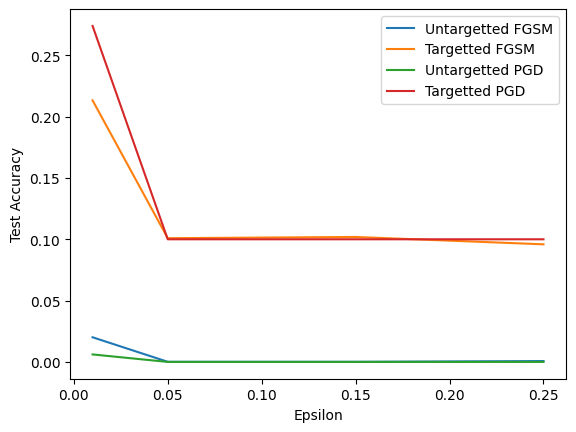

In [12]:
# Plotting the variation of accuracies with epsilon
plt.plot([0.01,0.05, 0.15, 0.25], U_FGSM_ACC, label="Untargetted FGSM")
plt.plot([0.01,0.05, 0.15, 0.25], T_FGSM_ACC, label="Targetted FGSM")
plt.plot([0.01,0.05, 0.15, 0.25], U_PGD_ACC, label="Untargetted PGD")
plt.plot([0.01,0.05, 0.15, 0.25], T_PGD_ACC, label="Targetted PGD")
plt.xlabel("Epsilon")
plt.ylabel("Test Accuracy")
plt.legend()

## Adversarial Training


In [13]:
# Now performing adversarial training on the model and checking the accuracies again

def adversarial_training(model, train_data, test_data, loss_fn, e=0.05, a=0.01, num_iter=20, num_epochs=10, batch_size=32):
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    for epoch in range(num_epochs):
        for t, (x, y) in enumerate(train_loader):
            x = x.to(device=device, dtype=dtype)
            y = y.to(device=device, dtype=torch.long)
            x.requires_grad = True
            # 5% samples are adversarial
            if np.random.rand() < 0.05:
                for t in range(num_iter):
                    scores = model(x)
                    loss = loss_fn(scores, y)
                    model.zero_grad()
                    loss.backward()
                    x_grad = x.grad.data
                    x_adv = x + a * x_grad.sign()
                    x_adv = torch.min(torch.max(x_adv, x - e), x + e)
                    x_adv = torch.clamp(x_adv, 0, 1)
                    x = x_adv.detach().requires_grad_(True)
            train_preds = model(x)
            loss = loss_fn(train_preds, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss += loss.item()
        loss /= len(train_loader)
        train_acc, _ = check_acc(train_loader, model, loss_fn)
        print(f'Epoch {epoch}, Train Loss: {loss:.4f}, Train Acc: {train_acc:.4f}')
    
    print("Clean Accuracy:")
    eval_model(model, test_data, loss_fn)

In [16]:
# Testing the adversarial training function
test_model = MyModel(3, 32, 10).to(device=device)
loss_fn = nn.CrossEntropyLoss()

adversarial_training(test_model, train_data, test_data, loss_fn, e=0.1, a=0.01, num_iter=30, num_epochs=100, batch_size=32)
torch.save(test_model.state_dict(), 'model1.pth')
print("################################################################################")

Epoch 0, Train Loss: 0.0024, Train Acc: 0.4379
Epoch 1, Train Loss: 0.0017, Train Acc: 0.5387
Epoch 2, Train Loss: 0.0017, Train Acc: 0.5435
Epoch 3, Train Loss: 0.0020, Train Acc: 0.5660
Epoch 4, Train Loss: 0.0015, Train Acc: 0.5566
Epoch 5, Train Loss: 0.0018, Train Acc: 0.6038
Epoch 6, Train Loss: 0.0016, Train Acc: 0.5972
Epoch 7, Train Loss: 0.0015, Train Acc: 0.5987
Epoch 8, Train Loss: 0.0016, Train Acc: 0.5933
Epoch 9, Train Loss: 0.0016, Train Acc: 0.5958
Epoch 10, Train Loss: 0.0013, Train Acc: 0.6254
Epoch 11, Train Loss: 0.0021, Train Acc: 0.6254
Epoch 12, Train Loss: 0.0017, Train Acc: 0.5778
Epoch 13, Train Loss: 0.0013, Train Acc: 0.6315
Epoch 14, Train Loss: 0.0013, Train Acc: 0.5879
Epoch 15, Train Loss: 0.0018, Train Acc: 0.6234
Epoch 16, Train Loss: 0.0020, Train Acc: 0.6092
Epoch 17, Train Loss: 0.0012, Train Acc: 0.6226
Epoch 18, Train Loss: 0.0106, Train Acc: 0.6295
Epoch 19, Train Loss: 0.0011, Train Acc: 0.6523
Epoch 20, Train Loss: 0.0013, Train Acc: 0.6252
Ep

In [17]:
print("Adversarial Accuracies on Adversarially Trained Model:")
U_FGSM_ACC_adv = []
T_FGSM_ACC_adv = []
U_PGD_ACC_adv = []
T_PGD_ACC_adv = []
for epsilon in [0.01, 0.05, 0.15, 0.25]:
    print("############################")
    print(f"Epsilon = {epsilon}")
    acc1 = eval_untargetted_fgsm(test_model, test_data, loss_fn, e=epsilon)
    acc2 = eval_targeted_fgsm(test_model, test_data, loss_fn, e = epsilon, target_label=torch.full((20,), 7))
    acc3 = eval_untargetted_pgd(test_model, test_data, loss_fn, e=epsilon, a=0.01, num_iter=10)
    acc4 = eval_targeted_pgd(test_model, test_data, loss_fn, target_label=torch.full((20,), 7), e=epsilon, a=0.002, num_iter=30)

    U_FGSM_ACC_adv.append(acc1)
    T_FGSM_ACC_adv.append(acc2)
    U_PGD_ACC_adv.append(acc3)
    T_PGD_ACC_adv.append(acc4)

Adversarial Accuracies on Adversarially Trained Model:
############################
Epsilon = 0.01
Untargetted FGSM Test Loss: 1.6113, Untargetted FGSM Test Acc: 0.3818
Targetted FGSM Test Loss: 1.1837, Targetted FGSM Test Acc: 0.6189
Untargeted PGD Test Loss: 1.7548, Untargeted PGD Test Acc: 0.3229
Targeted PGD Test Loss: 1.2298, Targeted PGD Test Acc: 0.5934
############################
Epsilon = 0.05
Untargetted FGSM Test Loss: 2.3214, Untargetted FGSM Test Acc: 0.1629
Targetted FGSM Test Loss: 1.7109, Targetted FGSM Test Acc: 0.3608
Untargeted PGD Test Loss: 3.9162, Untargeted PGD Test Acc: 0.0055
Targeted PGD Test Loss: 2.2340, Targeted PGD Test Acc: 0.1821
############################
Epsilon = 0.15
Untargetted FGSM Test Loss: 2.4495, Untargetted FGSM Test Acc: 0.1441
Targetted FGSM Test Loss: 2.2167, Targetted FGSM Test Acc: 0.2010
Untargeted PGD Test Loss: 4.8073, Untargeted PGD Test Acc: 0.0006
Targeted PGD Test Loss: 2.3873, Targeted PGD Test Acc: 0.1586
#####################

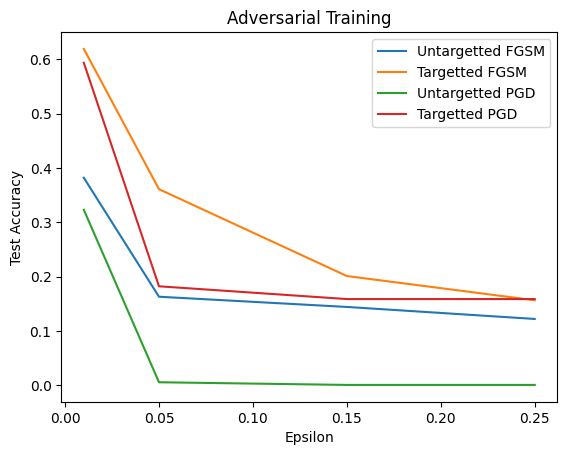

In [18]:
# Plotting the variation of accuracies with epsilon
plt.plot([0.01, 0.05, 0.15, 0.25], U_FGSM_ACC_adv, label="Untargetted FGSM")
plt.plot([0.01, 0.05, 0.15, 0.25], T_FGSM_ACC_adv, label="Targetted FGSM")
plt.plot([0.01, 0.05, 0.15, 0.25], U_PGD_ACC_adv, label="Untargetted PGD")
plt.plot([0.01, 0.05, 0.15, 0.25], T_PGD_ACC_adv, label="Targetted PGD")
plt.xlabel("Epsilon")
plt.ylabel("Test Accuracy")
plt.title("Adversarial Training")
plt.legend()
plt.show()
